In [1]:
from google.colab import drive
drive.mount('/drive')


Mounted at /drive


In [15]:
path_to_file ='/drive/MyDrive/kc_house_data_preprocessed.csv'

In [16]:
import pandas as pd

In [17]:

house_df = pd.read_csv(path_to_file)
house_df

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = house_df.drop(axis=1,columns=['price'])
y = house_df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [24]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
import matplotlib.pyplot as plt

In [57]:
reg_tree = DecisionTreeRegressor(max_depth = 9)

reg_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

[Text(0.5807451186830015, 0.95, 'grade <= 8.5\nsquared_error = 140987310301.935\nsamples = 15129\nvalue = 543257.349'),
 Text(0.32192764165390503, 0.85, 'lat <= 47.535\nsquared_error = 38375505308.645\nsamples = 12165\nvalue = 439259.978'),
 Text(0.16649119448698316, 0.75, 'sqft_living <= 2017.0\nsquared_error = 13055129551.099\nsamples = 5079\nvalue = 316244.823'),
 Text(0.08652373660030628, 0.65, 'sqft_living <= 1525.0\nsquared_error = 7286299215.651\nsamples = 3429\nvalue = 275912.993'),
 Text(0.04843032159264931, 0.55, 'view <= 0.5\nsquared_error = 5970128049.539\nsamples = 1886\nvalue = 249008.045'),
 Text(0.02450229709035222, 0.45, 'lat <= 47.519\nsquared_error = 4576505554.372\nsamples = 1819\nvalue = 243904.636'),
 Text(0.01225114854517611, 0.35, 'sqft_living <= 1105.0\nsquared_error = 3796224417.262\nsamples = 1578\nvalue = 236319.288'),
 Text(0.006125574272588055, 0.25, 'sqft_lot15 <= 37162.0\nsquared_error = 3526260823.046\nsamples = 534\nvalue = 208530.268'),
 Text(0.003062

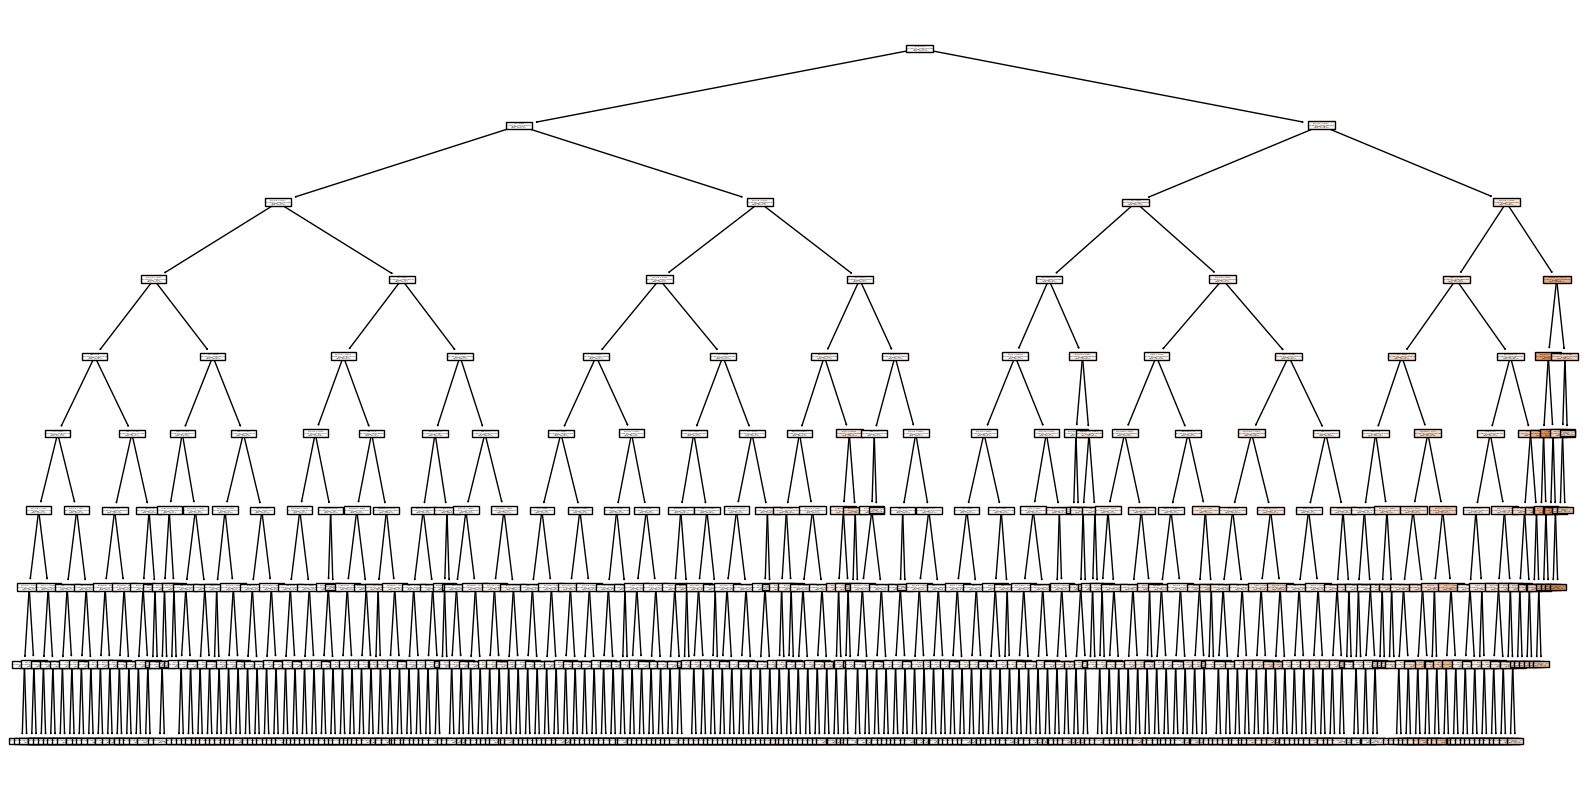

In [62]:
plt.figure(figsize=(20,10))
plot_tree(reg_tree,feature_names=x.columns,filled=True)

In [58]:
y_pred_train = reg_tree.predict(x_train)
y_pred_test = reg_tree.predict(x_test)

In [59]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
def print_metrics(y_true,y_pred):
  print(f"R2: {r2_score(y_true,y_pred)}")
  print("MAE: ",mean_absolute_error(y_true,y_pred))
  mse = mean_squared_error(y_true,y_pred)
  print("MSE: ",mse)
  print("RMSE : ",np.sqrt(mse))
  print("-"*30)

In [60]:
print_metrics(y_train,y_pred_train)

R2: 0.8950013160696306
MAE:  75267.90402322286
MSE:  14803482032.585796
RMSE :  121669.56083008517
------------------------------


In [61]:
print_metrics(y_test,y_pred_test)

R2: 0.7921441422244745
MAE:  92489.80525432908
MSE:  24985442238.671803
RMSE :  158067.84062127187
------------------------------
